In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [4]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


In [5]:
data.dropna(inplace = True)
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


In [6]:
data.index = pd.to_datetime(data.index)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [11]:
split1 = int(len(data) * 0.6)
split2 = int(len(data) * 0.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [13]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [14]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [22]:
model1 = sm.OLS(y_in, X_in).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        14:57:50   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529

In [24]:
y_pred = model1.predict(X_in)

# 4.) Recreate the graph fro your model

In [19]:
import matplotlib.pyplot as plt

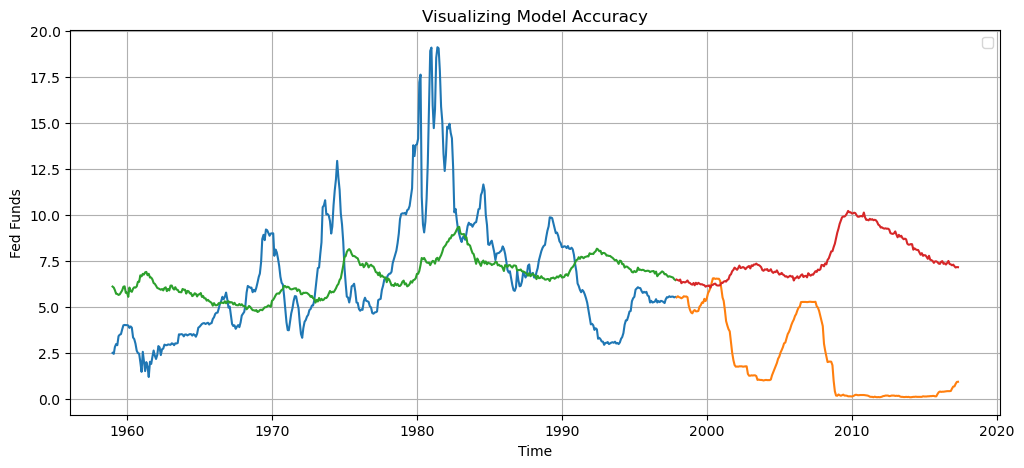

In [30]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in) #in sample actual
plt.plot(y_out) #out sample actual
plt.plot(model1.predict(X_in)) #in sample prediction
plt.plot(model1.predict(X_out)) #out sample prediction
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [34]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [48]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [43]:
max_degrees = 3

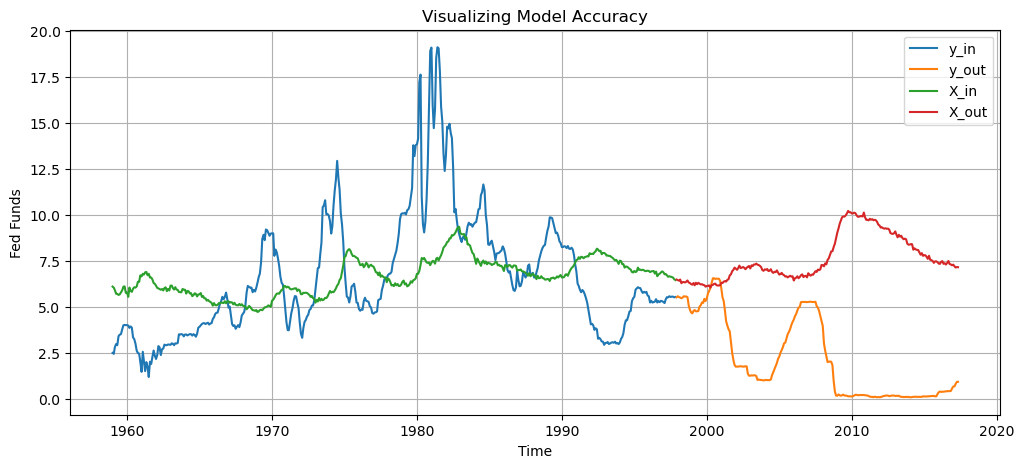

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565204


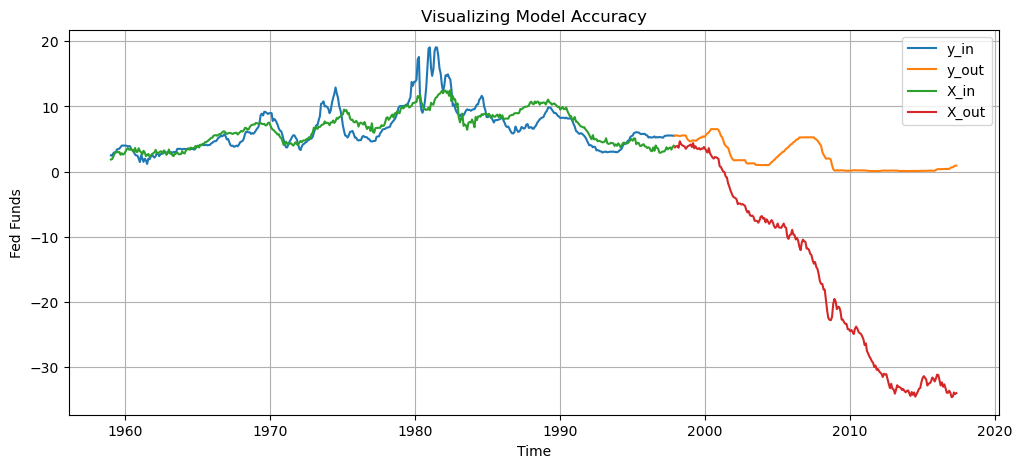

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099024405


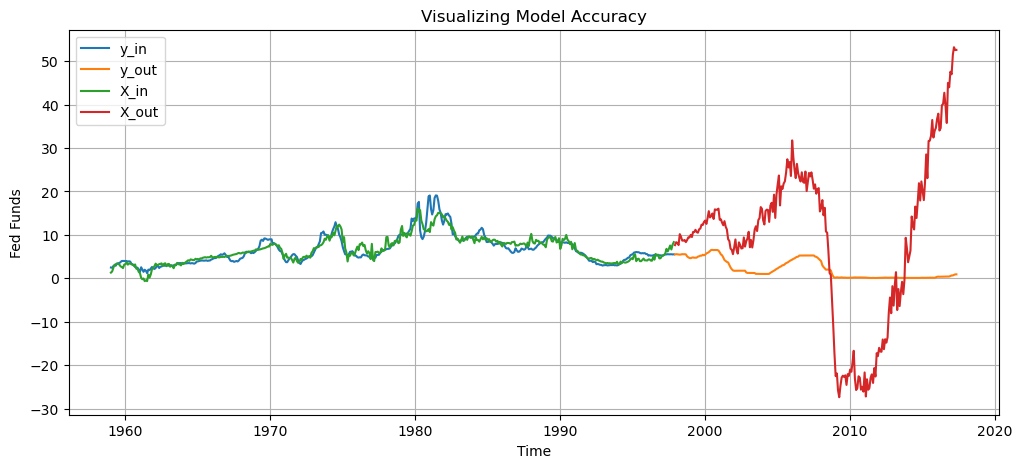

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744


In [55]:
for degrees in range(1, max_degrees+1):
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    ##
    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))
    ##
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    ###
    plt.plot(y_in) #in sample actual
    plt.plot(y_out) #out sample actual
    plt.plot(in_preds) #in sample prediction
    plt.plot(out_preds) #out sample prediction
    ###
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['y_in', 'y_out', 'X_in', 'X_out'])
    plt.grid()
    plt.show()
    
    ##
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

    #X is the preductions, Y is the real data
    

# 7.) State your observations :

This look shows clearly the tradeoff between bias and variance. It is amazing how closly the third degree polynomial tracks the training data, but the foreward prediction is completely unuseable as it attempts too closly follows the noise in the training data. Of these three models, it seems like the simplest model is the best to be carried foreward.